# Understanding GridSearchCV
Lets first load a breast cancer dataset to use in our examples

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [6]:
import pandas as pd

df = pd.DataFrame(X, columns = data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


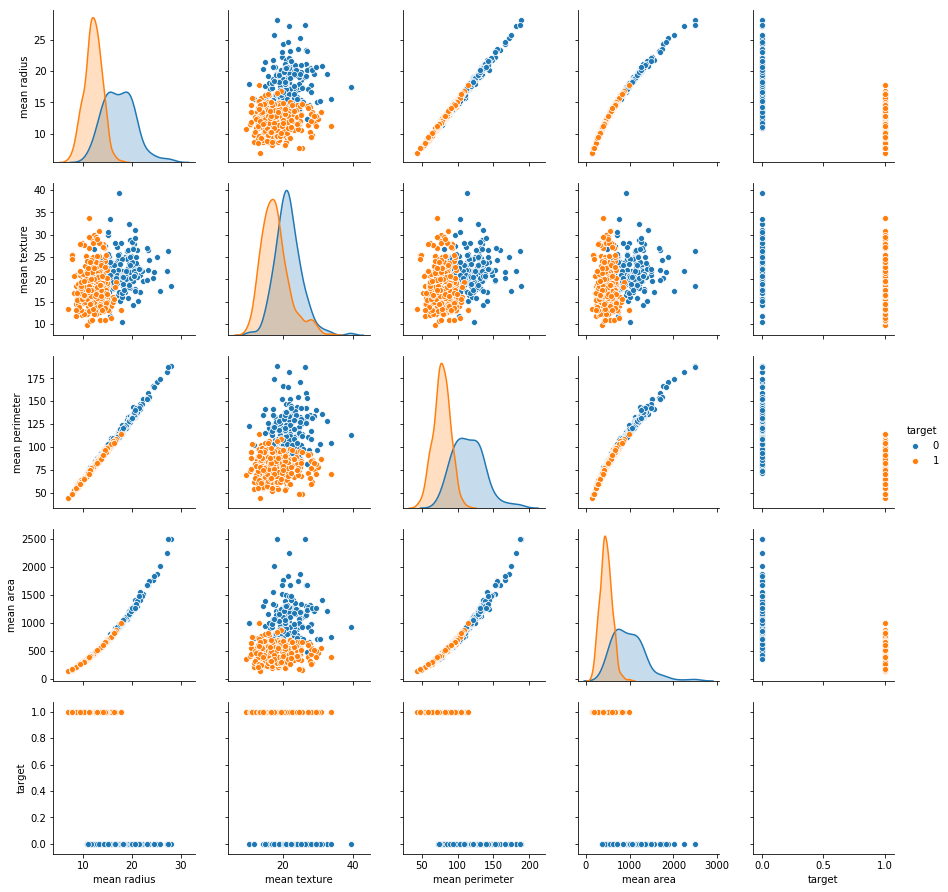

In [9]:
import seaborn as sns

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
sns.pairplot(df[columns], hue='target' )

For simplicity and allow us to visualize and get intuitions, let's reassign X as having only two features

In [10]:
new_columns = ['mean radius', 'mean texture']
X = df[new_columns].values

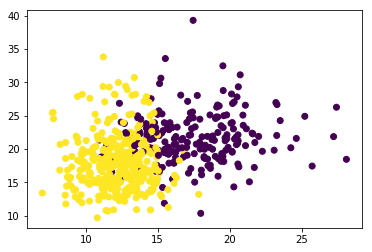

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# Cross-validation: evaluating estimator performance

- Reference: https://scikit-learn.org/stable/modules/cross_validation.html

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 

In [28]:
from sklearn.svm import SVC
clf = SVC(C=10000, gamma='auto')
clf.fit(X, y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
clf.score(X, y)

0.9859402460456942

Let's visualize it

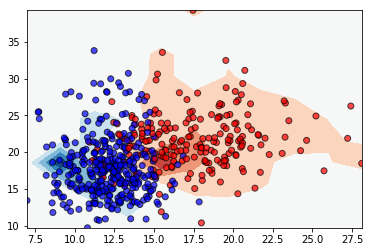

In [30]:
import visualml as vml

vml.plot_decision_boundary(clf, df[new_columns], df['target'], cols=new_columns)

To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

<img alt="Grid Search Workflow" class="align-center" src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" style="width: 400px; height: 240px;">

Grid Search Workflow
In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.svm import SVC
clf = SVC(C=1000, gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9714285714285714

In [33]:
clf.score(X_test, y_test)

0.8070175438596491

Let's try tweaking its parameters to optimize the test set

In [37]:
from sklearn.svm import SVC
clf = SVC(C=1, gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8596491228070176

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.

To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using $k-1$ of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img alt="../_images/grid_search_cross_validation.png" class="align-center" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="width: 500px; height: 300px;">

In [39]:
import numpy as np
np.linspace(0.5, 5, 20)

array([0.5       , 0.73684211, 0.97368421, 1.21052632, 1.44736842,
       1.68421053, 1.92105263, 2.15789474, 2.39473684, 2.63157895,
       2.86842105, 3.10526316, 3.34210526, 3.57894737, 3.81578947,
       4.05263158, 4.28947368, 4.52631579, 4.76315789, 5.        ])

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.linspace(0.5, 5, 20)}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters, cv=5)

In [41]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.5    , 0.73684, 0.97368, 1.21053, 1.44737, 1.68421, 1.92105,
       2.15789, 2.39474, 2.63158, 2.86842, 3.10526, 3.34211, 3.57895,
       3.81579, 4.05263, 4.28947, 4.52632, 4.76316, 5.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
clf.best_params_

{'C': 0.7368421052631579}

In [43]:
clf.best_estimator_

SVC(C=0.7368421052631579, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
clf.score(X_test, y_test)

0.8596491228070176

The above method was a shortcut for:

In [45]:
best_clf = clf.best_estimator_
best_clf.score(X_test, y_test)

0.8596491228070176